<a href="https://colab.research.google.com/github/greyhound101/segmentation/blob/master/segmentation_17_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:
import zipfile
with zipfile.ZipFile('/content/gdrive/My Drive/segmentation/Training_Batch1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [3]:
!git clone https://github.com/xmengli999/H-DenseUNet

Cloning into 'H-DenseUNet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 706 (delta 5), reused 0 (delta 0), pack-reused 697
Receiving objects: 100% (706/706), 13.77 MiB | 17.85 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [4]:
from zipfile import ZipFile
import subprocess, sys

def Unzip(zipFile, destinationDirectory):
    try:
        with ZipFile(zipFile, 'r') as zipObj:
            # Extract all the contents of zip file in different directory
            zipObj.extractall(destinationDirectory)
    except:
        print("An exception occurred extracting with Python ZipFile library.")
        print("Attempting to extract using 7zip")
        subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])
Unzip('/content/gdrive/My Drive/segmentation/test.zip', '/content/')

An exception occurred extracting with Python ZipFile library.
Attempting to extract using 7zip


In [10]:
import os
import glob
for i in range(5,70):
    os.remove('/content/test-volume-'+str(i)+'.nii')
  

In [6]:
import os
os.mkdir('/content/H-DenseUNet/data')
os.mkdir('/content/H-DenseUNet/data/TrainingData')
os.mkdir('/content/H-DenseUNet/data/TestData')

In [7]:
import shutil
import glob
for path in glob.glob('/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/segmentation-*.nii'):
  shutil.move(path,'/content/H-DenseUNet/data/TrainingData')

In [21]:

for path in glob.glob('/content/H-DenseUNet/data/TrainingData/segmentation*'):
  shutil.move(path,'/content/H-DenseUNet/data/myTrainingData')

In [8]:

for path in glob.glob('/content/media/nas/01_Datasets/CT/LITS/Training Batch 1/volume-*.nii'):
  shutil.move(path,'/content/H-DenseUNet/data/TrainingData')

In [11]:
for path in glob.glob('/content/test-volume-*.nii'):
  shutil.move(path,'/content/H-DenseUNet/data/TestData')

In [9]:

for i in range(5,28):
    os.remove( '/content/H-DenseUNet/data/TrainingData/segmentation-'+str(i)+'.nii')
    os.remove( '/content/H-DenseUNet/data/TrainingData/volume-'+str(i)+'.nii')

In [2]:
cd /content/H-DenseUNet

/content/H-DenseUNet


In [13]:
pip install -r requirements.txt

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 13.6MB 251kB/s 
     |████████████████████████████████| 153kB 54.6MB/s 
     |████████████████████████████████| 430kB 76.5MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 450kB 66.4MB/s 
     |████████████████████████████████| 583kB 63.5MB/s 
     |████████████████████████████████| 460kB 57.0MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [14]:
pip install medpy

     |████████████████████████████████| 153kB 8.4MB/s 
     |████████████████████████████████| 47.4MB 63kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp36-cp36m-linux_x86_64.whl size=753444 sha256=e59e83f9a0ce3f5d7b990b5fd7ce3ac7d086c3867735bdf3ffc459c820890b64
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [15]:
pip install tensorflow==1.13.1 

     |████████████████████████████████| 92.5MB 33kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 3.2MB 63.3MB/s 
     |████████████████████████████████| 368kB 50.0MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [16]:
pip install keras==2.2.4

     |████████████████████████████████| 317kB 9.2MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [17]:
!python preprocessing.py 

Saving image volume-4.nii
Saving image volume-2.nii
Saving image volume-0.nii
Saving image volume-3.nii
Saving image volume-1.nii
Saving image test-volume-24.nii
Saving image test-volume-21.nii
Saving image test-volume-22.nii
Saving image test-volume-23.nii
Saving image test-volume-20.nii
Generate liver txt 
Generate tumor txt
Generate liver box 


In [18]:
from shutil import copyfile
copyfile('/content/gdrive/My Drive/segmentation/model_best.hdf5','/content/H-DenseUNet/data/weights.hdf5')

'/content/H-DenseUNet/data/weights.hdf5'

In [3]:
!sh bash_train.sh

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

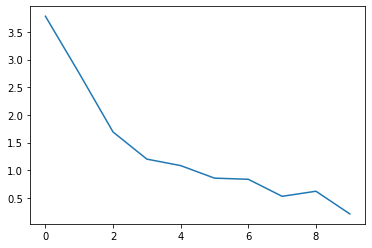

In [8]:
import numpy as np
from matplotlib import pyplot as plt
a=np.load('history.npy')
plt.plot(a)